In [65]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [74]:
df = pd.read_csv("/media/workspace/DeepFood/deep-reco-gym/output/evaluation/EvaluateTrivagoTestSetPredictions/results/TrivagoLogisticModelInteraction_selu____softmax_explorer_d7902efca1_f706a13545 (2)/df_offpolicy.csv")
df.head()

,timestamp,timestamp_diff,step,user_idx,session_idx,sum_action_item_before,action_type_item_idx,action_type_idx,list_action_type_idx,list_reference_search_for_poi,...,wifi (public areas),wifi (rooms),star,list_metadata,item_idx_action,rewards,item_idx_rhat_rewards,actions_rhat_rewards,action_rhat_rewards,ps_eval
0,1541461727,1541461708,2.0,3674,3219,0.0,809,2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 2]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",...,1,1,5,"[0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, ...",809,0.0,0.007804,"[0.013473743572831154, 0.029935818165540695, 0...",0.015862,9.493807e-08
1,1541461727,1541461708,2.0,3674,3219,0.0,809,2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 2]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",...,1,1,5,"[0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, ...",809,0.0,0.018580,"[0.03333979845046997, 0.08273039758205414, 0.0...",0.040667,9.791960e-08
2,1541461727,1541461708,2.0,3674,3219,0.0,809,2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 2]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",...,1,1,5,"[0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, ...",809,0.0,0.248508,"[0.029195822775363922, 0.07114550471305847, 0....",0.035418,6.156959e-07
3,1541461727,1541461708,2.0,3674,3219,0.0,809,2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 2]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",...,1,1,5,"[0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, ...",809,0.0,0.030177,"[0.025801967829465866, 0.17120973765850067, 0....",0.031180,4.538301e-07
4,1541461727,1541461708,2.0,3674,3219,0.0,809,2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 2]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",...,1,1,5,"[0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, ...",809,0.0,0.031495,"[0.023051101714372635, 0.008756771683692932, 0...",0.027747,2.398034e-11


In [75]:
#df = df[df.clicked == 1]
df.shape

(44648, 283)

In [76]:
df.iloc[10].actions_rhat_rewards

'[0.10347477346658707, 0.0012651387369260192, 0.0010026375530287623, 0.001463044434785843, 0.0020363524090498686, 0.01179302018135786, 0.005137670785188675, 0.004026832524687052, 0.03749173507094383, 0.022084688767790794, 0.008955225348472595, 0.005571853369474411, 0.001372088328935206, 0.00035998105886392295, 0.0009400477283634245, 0.011548865586519241, 0.0019031902775168419, 0.0021320274099707603, 0.010327587835490704, 0.005005544051527977, 0.0024223029613494873, 0.0009187207906506956, 0.0012633667793124914, 0.005177018232643604, 0.006230249535292387]'

In [77]:
import numpy as np
import scipy.stats


def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h


In [78]:
#sns.distplot(df.rhat_rewards)

In [79]:
e = 0.01
df2 = df[df.ps >= 0 + e]
df2.shape

(44648, 283)

/home/marlesson/anaconda3/envs/deep-reco-gym/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


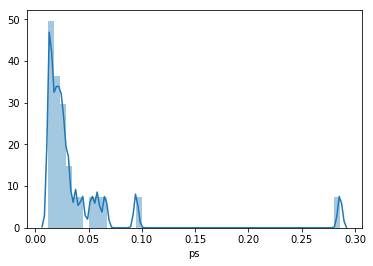

In [80]:
sns.distplot(df2.ps)

RuntimeError: Selected KDE bandwidth is 0. Cannot estiamte density.

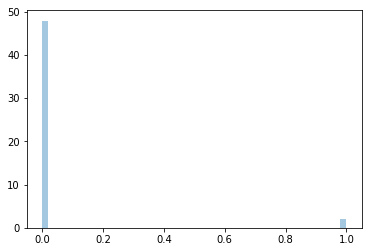

In [49]:
sns.distplot(df2.ps_eval)

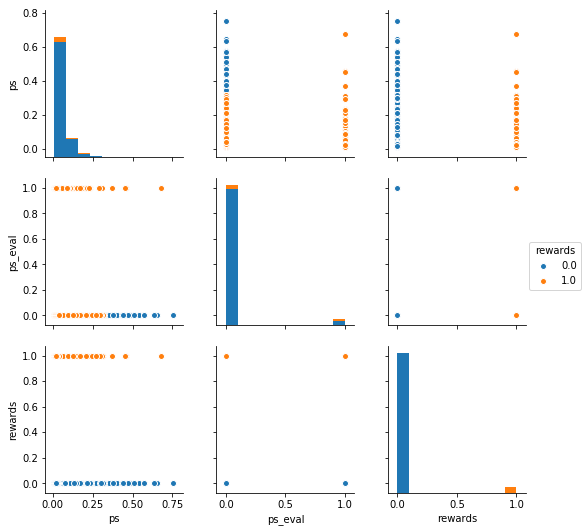

In [50]:
sns.pairplot(df2[["ps", "ps_eval", "rewards"]], hue="rewards")

## Offpolicy

In [51]:

from typing import List, Union, Dict, Tuple
from multiprocessing.pool import Pool
import os
import ast

from tqdm import tqdm

def parallel_literal_eval(series: Union[pd.Series, np.ndarray], pool: Pool = None, use_tqdm: bool = True) -> list:
    if pool:
        return _parallel_literal_eval(series, pool, use_tqdm)
    else:
        with Pool(os.cpu_count()) as p:
            return _parallel_literal_eval(series, p, use_tqdm)
def _parallel_literal_eval(series: Union[pd.Series, np.ndarray], pool: Pool, use_tqdm: bool = True) -> list:
    if use_tqdm:
        return list(tqdm(pool.map(literal_eval_if_str, series), total=len(series)))
    else:
        return pool.map(literal_eval_if_str, series)

def literal_eval_if_str(element):
    if isinstance(element, str):
        return ast.literal_eval(element)
    return element


In [52]:
df["sorted_actions"] = parallel_literal_eval(df["sorted_actions"])
df["actions_rhat_rewards"] = parallel_literal_eval(df["actions_rhat_rewards"])
df["prob_actions"]   = parallel_literal_eval(df["prob_actions"])
df["action_scores"]  = parallel_literal_eval(df["action_scores"])
df["action_scores"]  = parallel_literal_eval(df["action_scores"])
df["action"]         = df["sorted_actions"].apply(lambda sorted_actions: sorted_actions[0])

100%|██████████| 10000/10000 [00:00<00:00, 4460127.61it/s]


In [53]:
df.iloc[0]

timestamp                                                      1541544053
timestamp_diff                                                 1541543974
step                                                                    2
user_idx                                                             8181
session_idx                                                           537
                                              ...                        
item_idx_action                                                        33
rewards                                                                 0
actions_rhat_rewards    [0.0625884011387825, 0.011670851148664951, 0.0...
rhat_rewards                                                    0.0625884
ps_eval                                                                 0
Name: 0, Length: 287, dtype: object

In [54]:
df.iloc[0].actions_rhat_rewards

[0.0625884011387825,
 0.011670851148664951,
 0.008278348483145237,
 0.014965533278882504,
 0.007675020955502987,
 0.0016824721824377775,
 0.01714877411723137,
 0.05549728870391846,
 0.07456347346305847,
 0.005461480934172869,
 0.015337670221924782,
 0.036891207098960876,
 0.007515000645071268,
 0.020665936172008514,
 0.002770459745079279,
 0.004405587445944548,
 0.0009763476555235684,
 0.004645641427487135,
 0.00834516528993845,
 0.007493897341191769,
 0.058074552565813065,
 0.02677653357386589,
 0.01006397232413292,
 0.03748859465122223,
 0.01885138265788555]

In [55]:
np.sum(np.array(df.iloc[0].prob_actions) * np.array(df.iloc[0].actions_rhat_rewards))

0.0625884011387825

In [16]:
df.iloc[0].actions_rhat_rewards

[0.008895570412278175,
 0.1031133383512497,
 0.1482502818107605,
 0.0198933407664299,
 0.010252743028104305,
 0.031430669128894806,
 0.005116384010761976,
 0.029142329469323158,
 0.027408018708229065,
 0.0731290802359581,
 0.017673589289188385,
 0.005121891852468252,
 0.02514066733419895,
 0.014695684425532818,
 0.1766500174999237,
 0.008174460381269455,
 0.013728393241763115,
 0.09953118860721588,
 0.05285904183983803,
 0.009516865015029907,
 0.014002460986375809,
 0.05535589158535004,
 0.00014127131726127118,
 0.04759342595934868,
 0.03613501042127609]

In [ ]:
df.iloc[0].rhat_rewards

In [ ]:
def _calc_sample_weigths(rewards, t_props, l_props):
  # Compute the sample weights - propensity ratios
  p_ratio = t_props / l_props

  # Effective sample size for E_t estimate (from A. Owen)
  n_e = len(rewards) * (np.mean(p_ratio) ** 2) / (p_ratio ** 2).mean()

  # Critical value from t-distribution as we have unknown variance
  alpha = .00125
  cv = scipy.stats.t.ppf(1 - alpha, df=int(n_e) - 1)

  return p_ratio, n_e, cv

def eval_IPS(rewards, t_props, l_props):
  # Calculate Sample Weigths
  p_ratio, n_e, cv =  _calc_sample_weigths(rewards, t_props, l_props)

  ###############
  # VANILLA IPS #
  ###############
  # Expected reward for pi_t
  E_t = np.mean(rewards * p_ratio)

  # Variance of the estimate
  var = ((rewards * p_ratio - E_t) ** 2).mean()
  stddev = np.sqrt(var)

  # C.I. assuming unknown variance - use t-distribution and effective sample size
  c = cv * stddev / np.sqrt(int(n_e))
  min_bound = E_t - c
  max_bound = E_t + c

  result = (E_t, c) # 0.025, 0.500, 0.975
  return result


def eval_CIPS(rewards, t_props, l_props, cap=15):
  # Calculate Sample Weigths
  p_ratio, n_e, cv =  _calc_sample_weigths(rewards, t_props, l_props)


  ############## 
  # CAPPED IPS #
  ##############
  # Cap ratios
  p_ratio_capped = np.clip(p_ratio, a_min=None, a_max=cap)

  # Expected reward for pi_t
  E_t_capped = np.mean(rewards * p_ratio_capped)

  # Variance of the estimate
  var_capped = ((rewards * p_ratio_capped - E_t_capped) ** 2).mean()
  stddev_capped = np.sqrt(var_capped)

  # C.I. assuming unknown variance - use t-distribution and effective sample size
  c = cv * stddev_capped / np.sqrt(int(n_e))

  min_bound_capped = E_t_capped - c
  max_bound_capped = E_t_capped + c

  result = (E_t_capped, c) # 0.025, 0.500, 0.975

  return result


def eval_doubly_robust(rhat_rewards, rewards, t_props, l_props, cap=None):
  # Calculate Sample Weigths
  p_ratio, n_e, cv =  _calc_sample_weigths(rewards, t_props, l_props)


  # Cap ratios
  if cap is not None:
    p_ratio = np.clip(p_ratio, a_min=None, a_max=cap)

  #################
  # Roubly Robust #
  #################
  dr = rhat_rewards + (p_ratio*(rewards-rhat_rewards))

  confidence=0.95
  n = len(dr)
  m, se = np.mean(dr), scipy.stats.sem(dr)
  h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

  return m, h

In [ ]:
df.rewards.mean()

In [ ]:
v = []
for i, row in df.iterrows():
    #if row.ps > 0.01:
    #v.append((row.rewards * row.ps_eval)/row.ps)
    v.append((row.rewards * row.ps))
np.mean(v)

In [ ]:
df.ps.describe()

In [ ]:
_df = df[df.ps > 0.01]

p_ratio, n_e, cv = _calc_sample_weigths(_df.rewards, _df.ps_eval, _df.ps)
_df['p_ratio'] = p_ratio

ips, c_ips = eval_IPS(_df.rewards, _df.ps_eval, _df.ps)
print("eval_IPS", ips, c_ips)

ips, c_ips = eval_CIPS(_df.rewards, _df.ps_eval, _df.ps, cap=10)
print("eval_CIPS", ips, c_ips)

In [ ]:
sns.distplot(p_ratio)

In [ ]:
_df[['ps', 'ps_eval', 'p_ratio']].sort_values('p_ratio')

## Fainess

In [ ]:
from typing import List, Dict, Any

import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, multilabel_confusion_matrix, classification_report

def mean_confidence_interval(data, confidence=0.95):
    data = np.array(data)
    data = data[~np.isnan(data)]
    a = 1.0 * data
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, h

# https://stackoverflow.com/questions/50666091/true-positive-rate-and-false-positive-rate-tpr-fpr-for-multi-class-data-in-py
# https://en.wikipedia.org/wiki/Sensitivity_and_specificity
def calculate_fairness_metrics(df: pd.DataFrame, sub_keys: List[str], ground_truth_key: str,
                               prediction_key: str) -> pd.DataFrame:
    rows: List[Dict[str, Any]] = []

    for sub_key in sub_keys:
        subs = df[sub_key].unique()

        for sub in subs:
            sub_df = df[df[sub_key] == sub]

            y_true, y_pred = sub_df[ground_truth_key], sub_df[prediction_key]

            cnf_matrix     = confusion_matrix(y_true, y_pred)

            num_positives  = np.sum(np.diag(cnf_matrix))
            num_negatives  = np.sum(cnf_matrix) - num_positives

            fp = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix)  
            fn = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
            tp = np.diag(cnf_matrix)
            tn = cnf_matrix.sum() - (fp + fn + tp)

            fp = fp.astype(float)
            fn = fn.astype(float)
            tp = tp.astype(float)
            tn = tn.astype(float)

            # Sensitivity, hit rate, recall, or true positive rate
            tpr = tp/(tp+fn)
            # Specificity or true negative rate
            tnr = tn/(tn+fp) 
            # Precision or positive predictive value
            ppv = tp/(tp+fp)
            # Negative predictive value
            npv = tn/(tn+fn)
            # Fall out or false positive rate
            fpr = fp/(fp+tn)
            # False negative rate
            fnr = fn/(tp+fn)
            # False discovery rate
            fdr = fp/(tp+fp)
            # positive rate
            pr  = (tp+fp)/(tp+fp+fn+tn)
            # positive rate
            nr  = (tn+fn)/(tp+fp+fn+tn)

            # Overall accuracy
            acc = (tp+tn)/(tp+fp+fn+tn)

            # Balanced Accuracy (BA)
            bacc =  (tpr+tnr)/2

            #print(classification_report(y_true,y_pred))
            fpr, fpr_c  = mean_confidence_interval(fpr)
            fnr, fnr_c  = mean_confidence_interval(fnr)
            tpr, tpr_c  = mean_confidence_interval(tpr)
            tnr, tnr_c  = mean_confidence_interval(tnr)
            pr,  pr_c   = mean_confidence_interval(pr)
            nr,  nr_c   = mean_confidence_interval(nr)
            acc, acc_c  = mean_confidence_interval(acc)
            bacc, bacc_c  = mean_confidence_interval(bacc)

            rows.append({
                "sub_key": sub_key,
                "sub": sub,
                "total_class": len(tp),
                "false_positive_rate": fpr,
                "false_positive_rate_C": fpr_c,
                "false_negative_rate": fnr,
                "false_negative_rate_C": fnr_c,
                "true_positive_rate": tpr,
                "true_positive_rate_C": tpr_c,
                "true_negative_rate": tnr,
                "true_negative_rate_C": tnr_c,
                "positive_rate": pr,
                "positive_rate_C": pr_c,
                "negative_rate": nr,
                "negative_rate_C": nr_c,
                "accuracy": acc,
                "accuracy_C": acc_c,
                "balance_accuracy": bacc,
                "balance_accuracy_C": bacc_c,
                "total_positives": num_positives,
                "total_negatives": num_negatives,
                "total_individuals": num_positives+ num_negatives,
            })

    return pd.DataFrame(data=rows).sort_values(["sub_key", "sub"])

from typing import List, Union, Dict, Tuple
from multiprocessing.pool import Pool
import os
import ast

from tqdm import tqdm

def parallel_literal_eval(series: Union[pd.Series, np.ndarray], pool: Pool = None, use_tqdm: bool = True) -> list:
    if pool:
        return _parallel_literal_eval(series, pool, use_tqdm)
    else:
        with Pool(os.cpu_count()) as p:
            return _parallel_literal_eval(series, p, use_tqdm)
def _parallel_literal_eval(series: Union[pd.Series, np.ndarray], pool: Pool, use_tqdm: bool = True) -> list:
    if use_tqdm:
        return list(tqdm(pool.map(literal_eval_if_str, series), total=len(series)))
    else:
        return pool.map(literal_eval_if_str, series)

def literal_eval_if_str(element):
    if isinstance(element, str):
        return ast.literal_eval(element)
    return element


In [ ]:
#df = pd.read_csv("/media/workspace/DeepFood/deep-reco-gym/output/trivago/dataset/Rio_de_Janeiro_Brazil/test_0.20_test=time_42_PrepareTrivagoSessionsDataFrames____None_time_170e5151cd.csv")
#
df = pd.read_csv("/media/workspace/DeepFood/deep-reco-gym/output/interaction/TrivagoLogisticModelInteraction/results/TrivagoLogisticModelInteraction_selu____explore_then_exp_f4b976269c/test_set_predictions.csv")
df.head()



In [ ]:
#df.columns

In [ ]:
df["sorted_actions"] = parallel_literal_eval(df["sorted_actions"])
df["prob_actions"]   = parallel_literal_eval(df["prob_actions"])
df["action_scores"]  = parallel_literal_eval(df["action_scores"])
df["action_scores"]  = parallel_literal_eval(df["action_scores"])
df["action"]         = df["sorted_actions"].apply(lambda sorted_actions: sorted_actions[0])

In [ ]:
row = df.iloc[0]
row.sorted_actions

In [ ]:
row.item_idx, row.action

In [ ]:
df_exploded = df.reset_index().explode('sorted_actions')
df_exploded
#df_stack    = df_exploded.sorted_actions.apply(pd.Series).reset_index().groupby('index')[0].apply(list)#.stack()#.groupby()#.reset_index()
#df_stack
#df['rhat_rewards_actions'] = df_stack#.values
#df.sample().head()

In [ ]:
df_implode = df_exploded.groupby('index').sorted_actions.apply(list)
df_implode.head()

In [ ]:
df.iloc[150]

In [ ]:
df_implode.iloc[150]

In [ ]:
ground_truth_df = df[df['clicked'] == 1]

fairness_columns = ['device_idx']
fairness_df       = ground_truth_df[['item_idx', "action",  *fairness_columns]]
fairness_metrics  = calculate_fairness_metrics(fairness_df, fairness_columns,
                                              'item_idx', "action")
fairness_metrics

In [ ]:
fairness_metrics[['sub_key', 'sub', 'total_class', 'total_individuals', 'true_positive_rate']]

In [ ]:
fairness_metrics[['total_class', 'total_individuals']].sum()

In [ ]:
_df = fairness_df[fairness_df.device_idx == 2]
_df.head()

In [ ]:
_df.item_idx.values#_df.action.values#

In [ ]:
items = np.unique(list(_df.action.values) + list(_df.item_idx.values))
len(items)